# Лабораторна робота №4
# Тема: Обробка зображень та робота з наборами файлів цифрових зображень

<div style="background-color: white;">
Виконав: студент групи КН - 222c Максименко Валентин Михайлович 
</div>
<div style="background-color: white;">
Перевірив: асистент кафедри Герман Олександрович Зверцев
</div>

Мета: Вивчення функцій Pandas для злиття, агрегування та візуалізації даних.

Завдання 1. Робота з набором файлів.
1) Сформувати в папці на диску набір із 15 зображень різних форматів,
розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.
2) Створити функцію, що в якості аргумента приймає адресу папки на диску
та повертає датафрейм з наступною інформацією про зображення, що
знаходяться в папці:
- ім’я файлу;
- кольорову модель;
- формат;
- кількість каналів у зображенні;
- розмір файлу у мегабайтах байтах, округлених до двох знаків після
коми;
- ширину картинки;
- висоту картинки;
- повний шлях до файлу;
- зменшене зображення.
Зауваження:
а) Якщо файл не є зображенням не додавати інформацію про нього в
датафрейм.
б) Для обробки набору файлів можете скористатися вбудованими модулями
glob (https://docs.python.org/3/library/glob.html), або zipfile
https://docs.python.org/3/library/zipfile.html
в) Для відображення картинки в датафреймі можете скористатись методом,
описаним в наступному матеріалі

,File_Name,Image_Format,Color_Mode,Channels,File_Size_MB,Width,Height,Full_Path,Resized_Image
0,1.jpg,JPEG,RGB,3,0.09,1024,644,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\1.jpg,
1,10.jpg,JPEG,RGB,3,0.14,1024,683,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\10.jpg,
2,11.jpg,JPEG,RGB,3,0.16,1024,682,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\11.jpg,
3,12.jpg,JPEG,RGB,3,0.07,1024,512,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\12.jpg,
4,13.jpg,JPEG,RGB,3,0.06,1024,512,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\13.jpg,
5,14.jpg,JPEG,RGB,3,0.13,1024,682,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\14.jpg,
6,15.jpg,JPEG,RGB,3,0.09,1024,731,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\15.jpg,
7,2.jpg,JPEG,RGB,3,0.07,1024,654,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\2.jpg,
8,3.jpg,JPEG,RGB,3,0.08,1024,683,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\3.jpg,
9,4.jpg,JPEG,RGB,3,0.12,1024,682,C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\4.jpg,

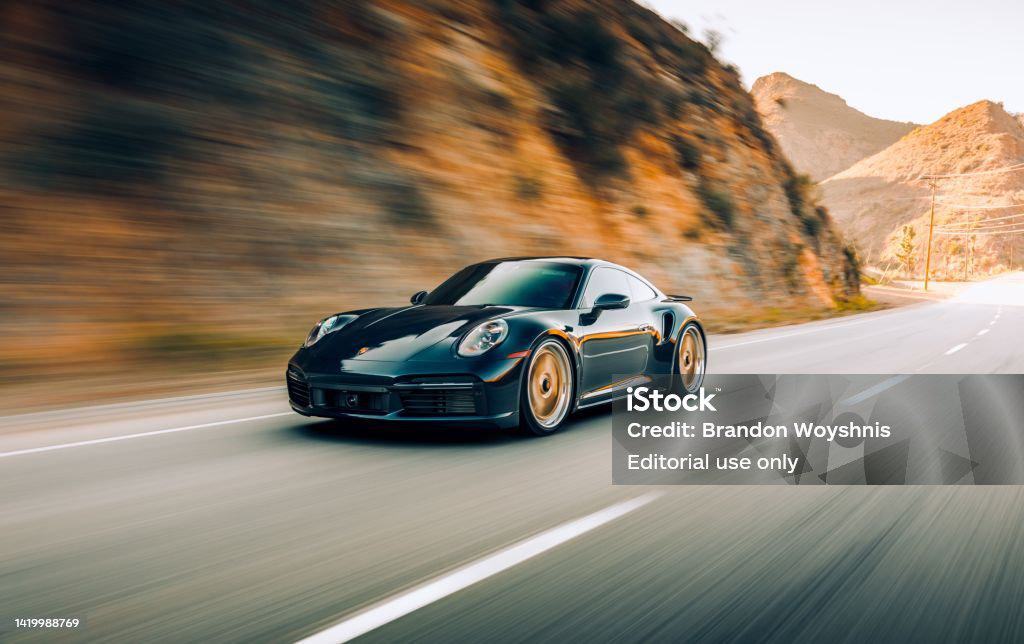
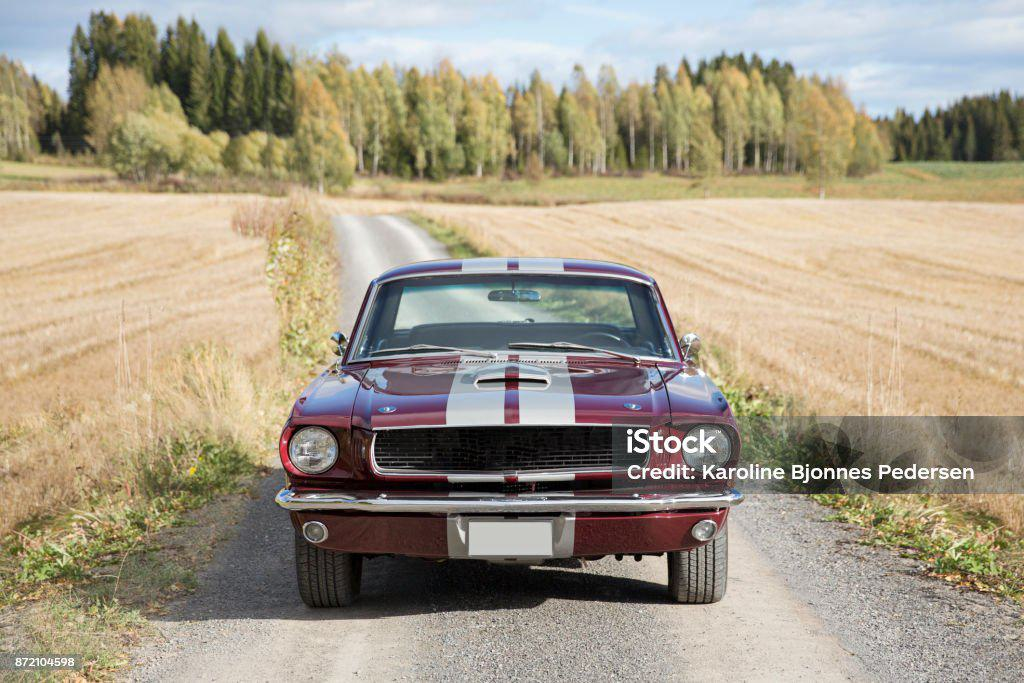
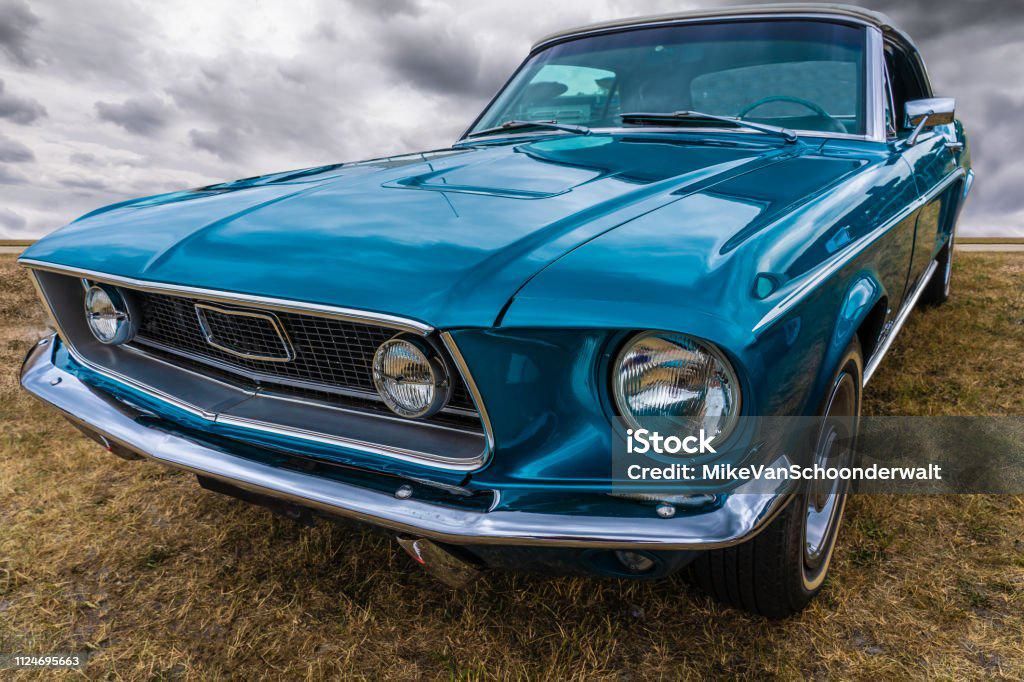
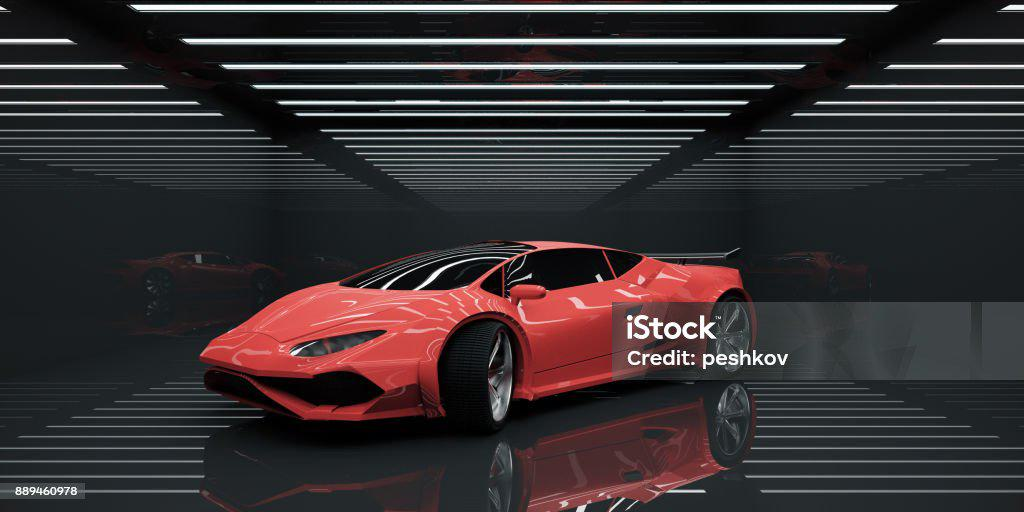
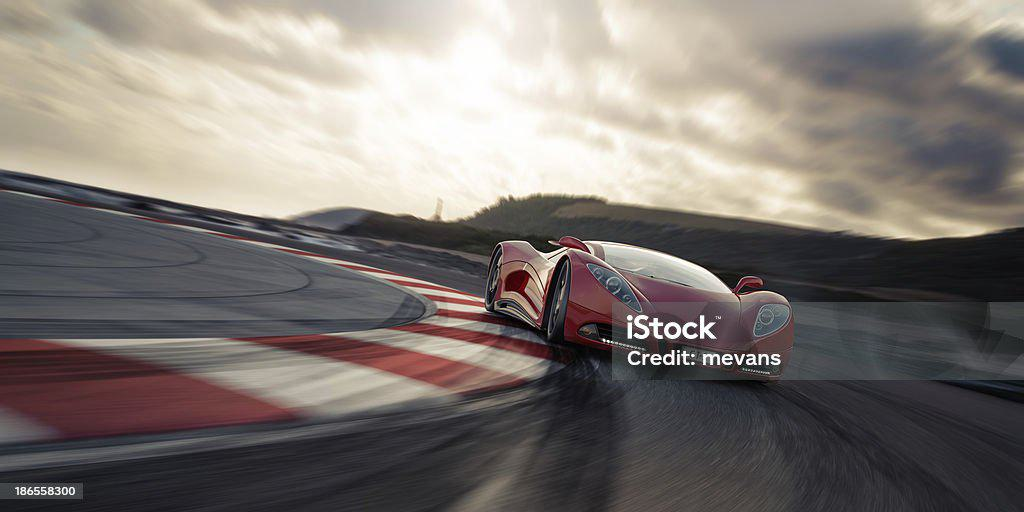
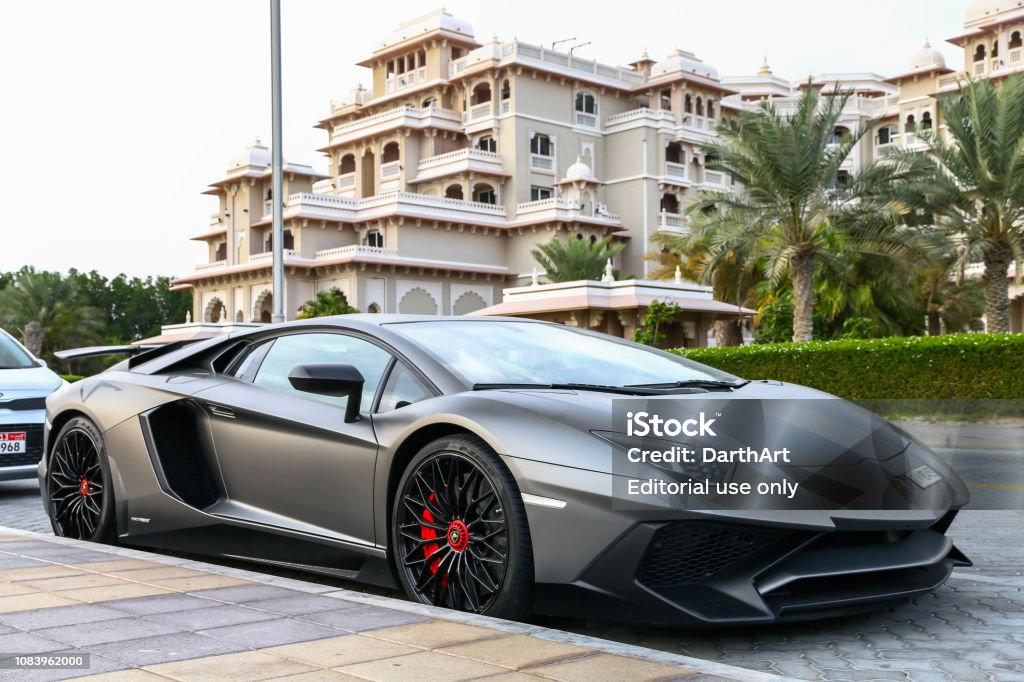
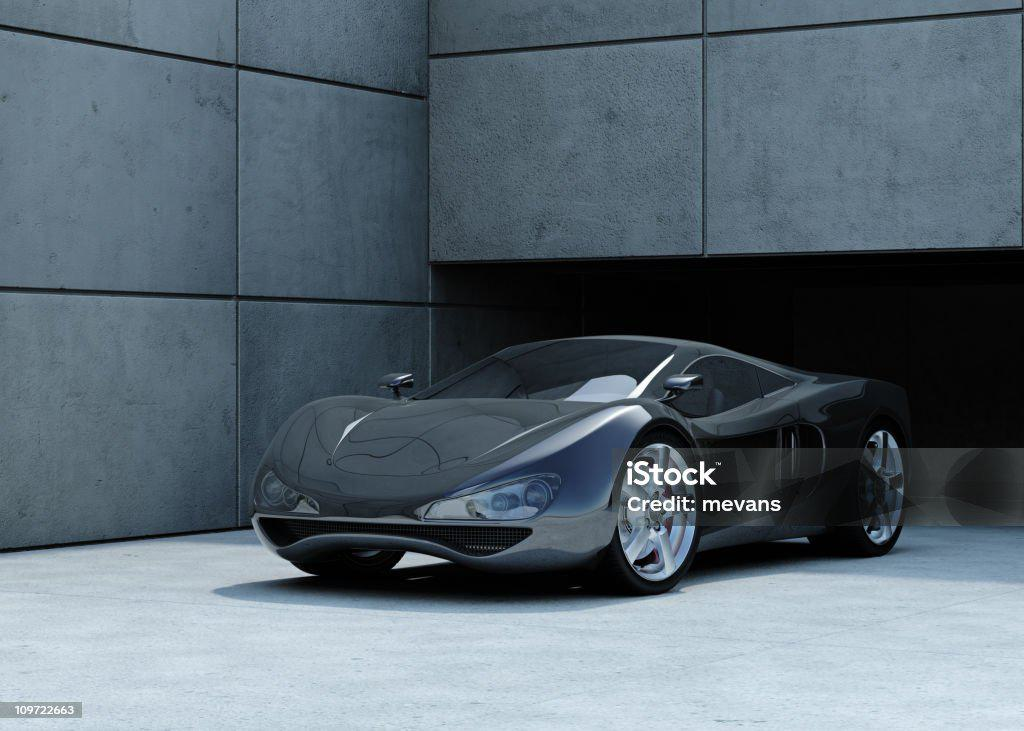
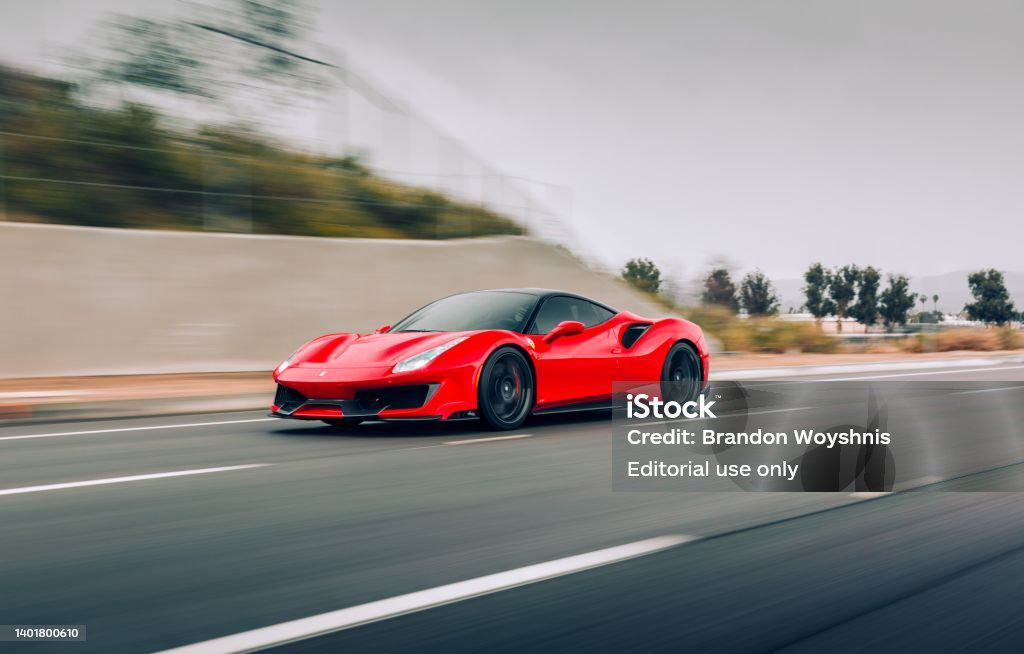
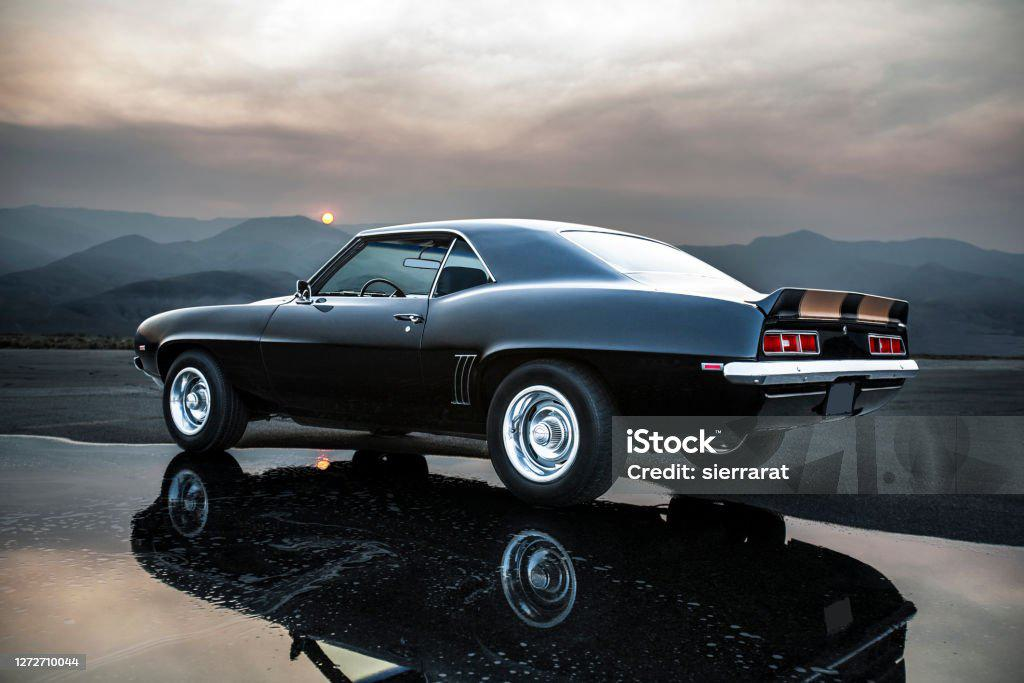
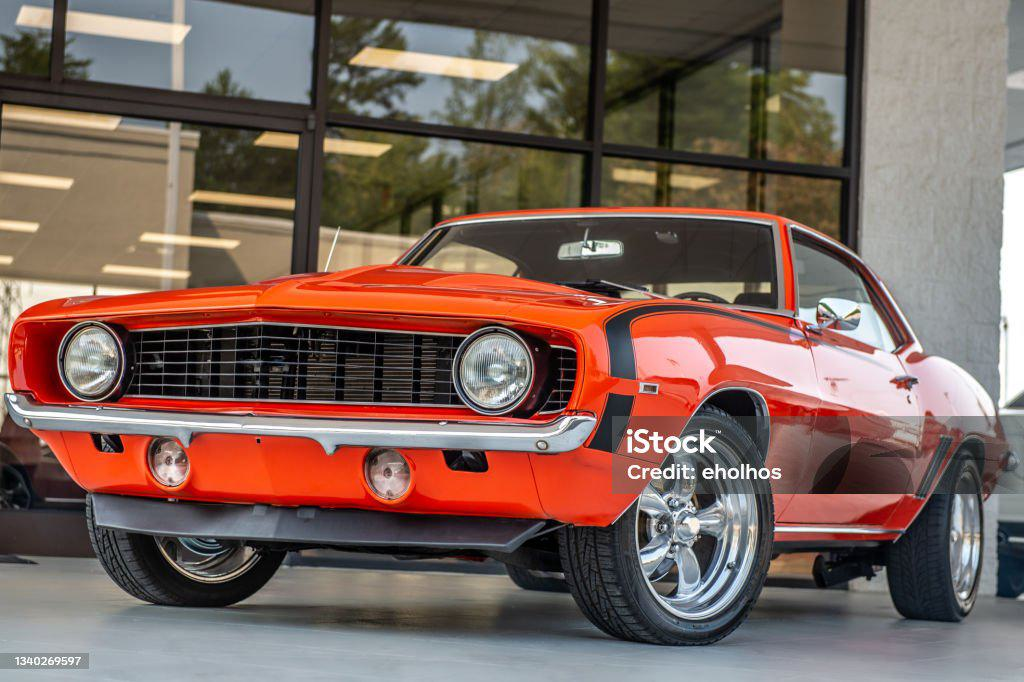
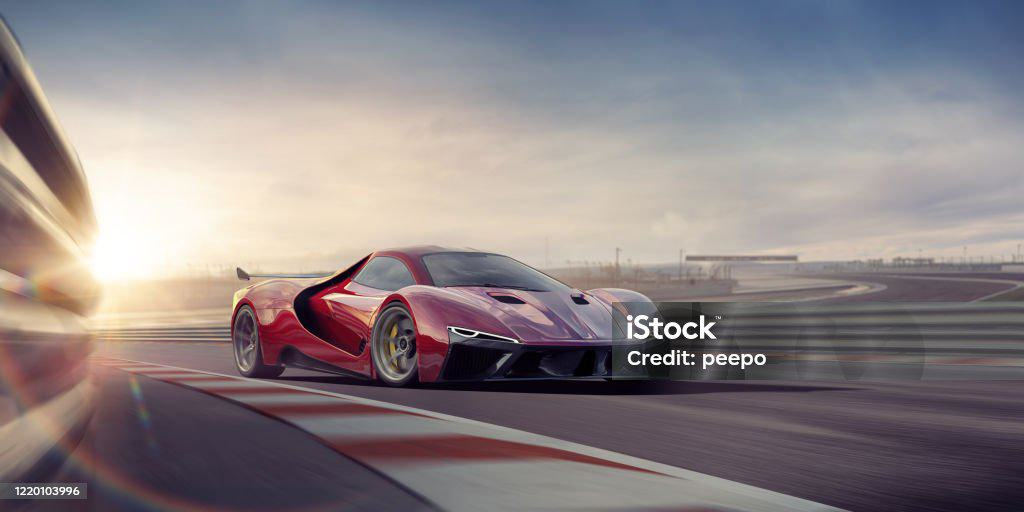
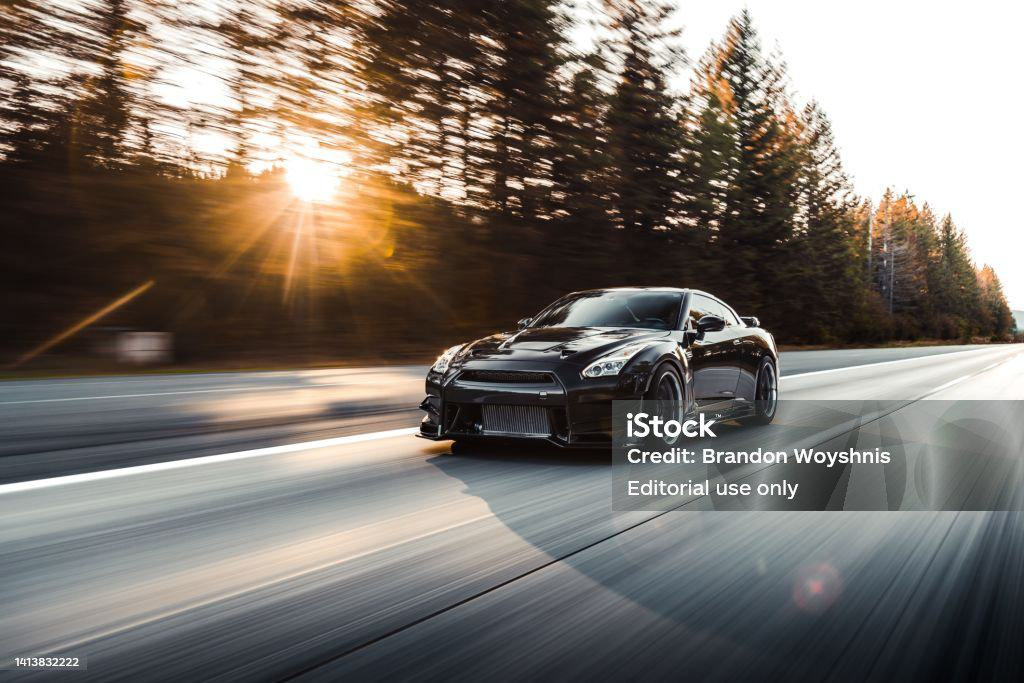
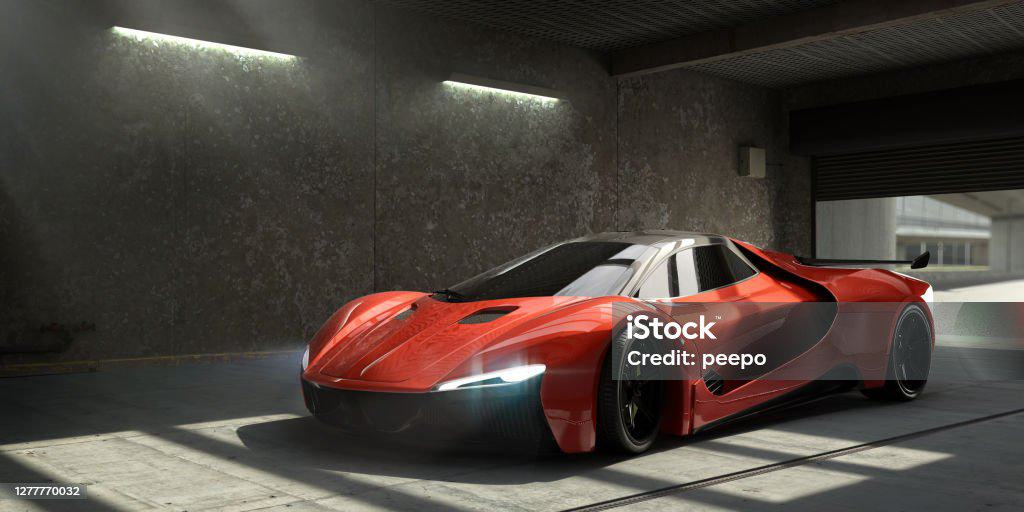
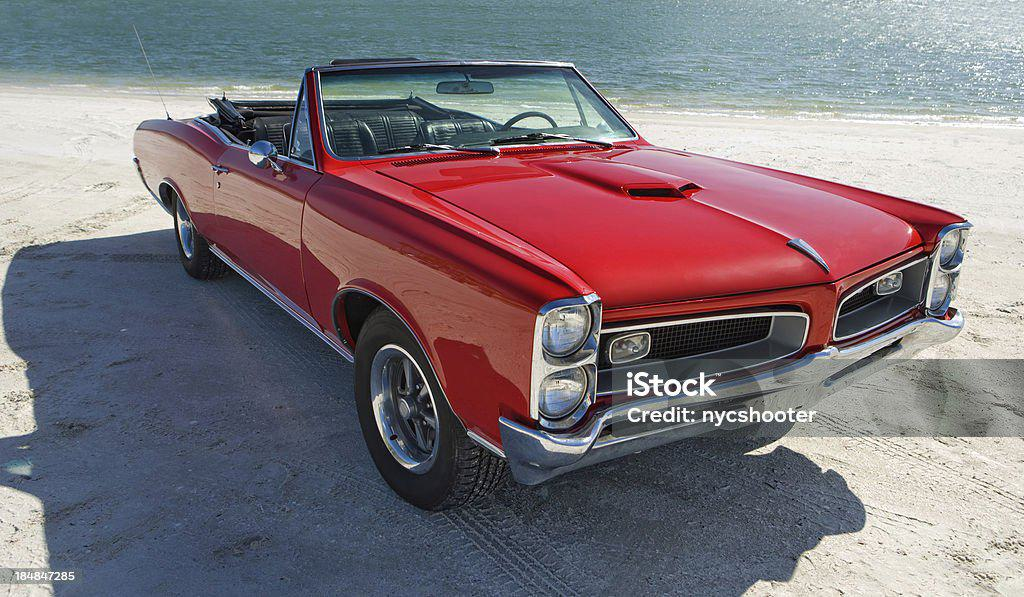
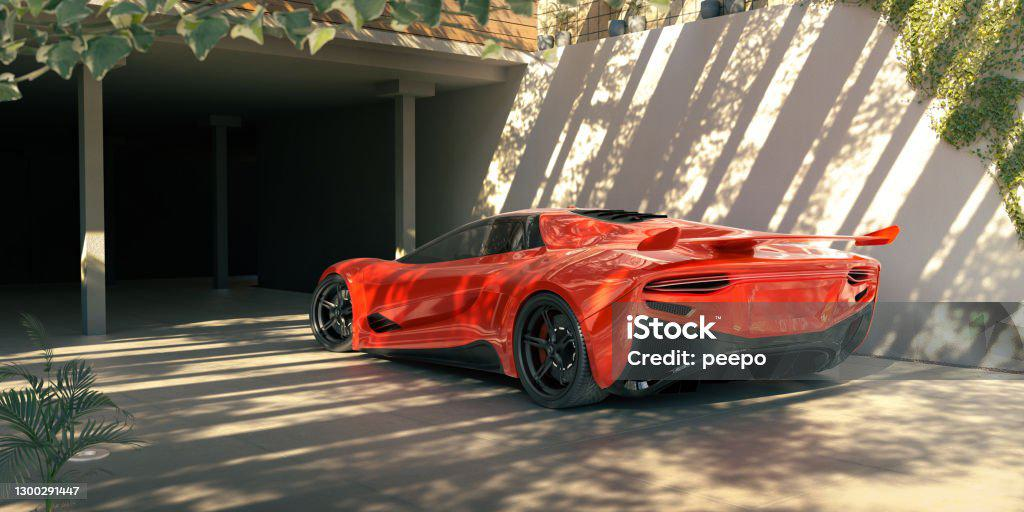

In [4]:
from PIL import Image
from IPython.display import display, HTML
from io import BytesIO
import os
import glob
import pandas as pd
import base64

def process_images(directory_path):
    
    image_data = []
    image_files = glob.glob(os.path.join(directory_path, '*'))

    for file_path in image_files:
        try:
            with Image.open(file_path) as img:
                
                file_name = os.path.basename(file_path)
                image_format = img.format
                color_mode = img.mode
                channels = len(img.getbands())
                file_size_MB = os.path.getsize(file_path) / (1024 * 1024)
                file_size_MB = round(file_size_MB, 2)
                width, height = img.size
                full_path = os.path.abspath(file_path)

                resized_img = img.convert("RGB")

                buffered = BytesIO()
                resized_img.save(buffered, format="JPEG")
                img_base64_str = base64.b64encode(buffered.getvalue()).decode()

                img_tag = f'<img src="data:image/jpeg;base64,{img_base64_str}">'

                image_data.append({
                    'File_Name': file_name,
                    'Image_Format': image_format,
                    'Color_Mode': color_mode,
                    'Channels': channels,
                    'File_Size_MB': file_size_MB,
                    'Width': width,
                    'Height': height,
                    'Full_Path': full_path,
                    'Resized_Image': img_tag
                })
        except (IOError, SyntaxError):
            
            continue

    df_images = pd.DataFrame(image_data)
    return df_images

folder_path = r'C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab'

image_dataframe = process_images(folder_path)
display(HTML(image_dataframe.to_html(escape=False)))

Завдання 2.
Створити функцію, що в якості аргумента приймає:
- шлях до папки;
- назва вихідного зображення;
- кількість зображень в рядку;
- кількість зображень в стовпчику
і повертає зображення постера.
Вважаємо, що постер є прямокутним і число картинок в постері a X b, де а – число стовпчиків, а b – число рядків.
Зауваження:
1) Створити функцію, що перетворює картинку на квадрат з максимально можливим розміром сторони (наприклад, якщо картинка розміром 800X533, то вихідний розмір повинен бути 533X533). Обрізаємо картинку з двох країв, тобто розмір розраховуємо від центру.
2) Всі картинки, з яких створено постер, повинні бути однакового розміру, Тобто після обрізки необхідно змінити розмір, наприклад, на 500X500.
3) Картинки для додавання в постер обирати випадковим чином. Картинки можуть повторюватись.
4) На картинку «накласти фільтр» червоного, зеленого, синього, жовтого, пурпурного або голубого кольорів, що також обираються випадковим чином та можуть повторюватись.
5) Надати 3-4 варіанти постерів, що збережено у файлах на диску.
6) Використовувати зображення, що знаходяться в папці, що сформована в завданні 1
7) Для обробки зображень використовувати бібліотеки Pillow та/або OpenCV.

In [5]:
from PIL import Image, ImageEnhance
import os
import random

def create_poster(source_folder, output_name, images_in_row, images_in_column):
    def apply_random_color_filter(image):
        color_filters = [
            'color', 'contrast', 'brightness', 'sharpness', 'sharpness', 'color'
        ]
        random_filter = random.choice(color_filters)

        enhanced_image = ImageEnhance.Color(image).enhance(3.0)
        saturation_factor = random.uniform(0.5, 2.0)

        if random_filter == 'color':
            enhanced_image = ImageEnhance.Color(enhanced_image).enhance(3.0 * saturation_factor)
        elif random_filter == 'contrast':
            enhanced_image = ImageEnhance.Contrast(enhanced_image).enhance(3.0 * saturation_factor)
        elif random_filter == 'brightness':
            enhanced_image = ImageEnhance.Brightness(enhanced_image).enhance(3.0 * saturation_factor)
        elif random_filter == 'sharpness':
            enhanced_image = ImageEnhance.Sharpness(enhanced_image).enhance(3.0 * saturation_factor)

        return enhanced_image

    image_paths = [os.path.join(source_folder, filename) for filename in os.listdir(source_folder)
                   if filename.endswith(".jpg") or filename.endswith(".jpeg")]

    poster_width = images_in_row * 500
    poster_height = images_in_column * 500
    poster = Image.new('RGB', (poster_width, poster_height))

    for i in range(images_in_row):
        for j in range(images_in_column):
            if image_paths:
            
                random_image_path = random.choice(image_paths)
                image_paths.remove(random_image_path)

                img = Image.open(random_image_path)
                width, height = img.size
                size = min(width, height)
                left = (width - size) / 2
                top = (height - size) / 2
                right = (width + size) / 2
                bottom = (height + size) / 2
                img = img.crop((left, top, right, bottom))
                img = img.resize((500, 500))

                img = apply_random_color_filter(img)

                poster.paste(img, (i * 500, j * 500))

    poster.save(output_name)

create_poster(r'C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab',
              r'C:\Users\Nikita\Desktop\Lab4_Pleshko_CS221v\images_test_for_lab\POSTER_TEST22.jpg',
              3,
              3)

**Висновок до Лабораторної Роботи №4**

У ході виконання лабораторної роботи було отримано цінні знання та навички в обробці цифрових зображень з використанням бібліотек Pillow та/або OpenCV, а також в роботі з наборами файлів цифрових зображень.

Однією з ключових задач було опрацювання зображень за допомогою бібліотеки Pillow, використовуючи різноманітні методи та фільтри для покращення якості та зовнішнього вигляду зображень. Було здійснено обрізку, зміну розміру, конвертацію та застосування різних фільтрів, таких як кольорова корекція, контраст, яскравість та різкість.

Додатково, було вивчено і використано бібліотеку OpenCV для роботи з зображеннями. Це дозволило розширити можливості обробки та аналізу зображень, використовуючи потужні алгоритми для виявлення об'єктів, фільтрації та виправлення зображень.

Окремий аспект лабораторної роботи був присвячений роботі з наборами файлів цифрових зображень. Вивчено та впроваджено практичні навички відбору, обробки та аналізу групи зображень для подальшого використання в інших завданнях.

Отримані знання та навички в обробці цифрових зображень мають практичне застосування у багатьох галузях, таких як комп'ютерне зору, медичне зображення, реклама, дизайн та інші. Лабораторна робота дозволила вдосконалити навички роботи з графічними бібліотеками та вивчити базові принципи обробки та аналізу зображень, що є важливим етапом в сучасній обробці даних.